## Plotting for aerosol initial conditions and aerosol emissions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import os
import numpy as np
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'



In [2]:
cwd = os.getcwd()

In [3]:
df = pd.read_csv(os.path.join(cwd, '..', 'urban_plume_aero_emiss.csv'))

In [8]:
df

,mode_name,mode_type,num_conc,geom_mean_diam,log10_geom_std_dev,mass_frac_OC,mass_frac_BC
0,cooking,log_normal,9000000.0,8.640000e-08,0.28,1.0,NaN
1,diesel,log_normal,160000000.0,5.000000e-08,0.24,0.3,0.7
2,gasoline,log_normal,50000000.0,5.000000e-08,0.24,0.8,0.2


In [7]:
def log_norm(Dp, Dpg, log10_std, Nt):
    a = Nt / (np.sqrt(2*np.pi)*log10_std)
    b = np.exp(-1*(np.log(Dp)- np.log(Dpg))**2/(2*(log10_std)**2))
    return a*b

In [38]:
n_grid = 500
part_diams = np.logspace(-9, -4, n_grid)

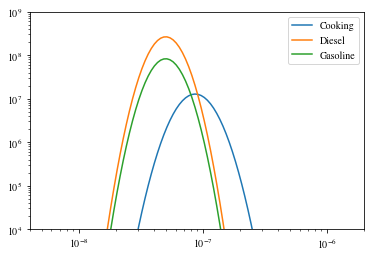

In [11]:
fig, ax = plt.subplots(1, 1)
for i in df.index:
    name = df.loc[i, 'mode_name']
    dpg = df.loc[i, 'geom_mean_diam']
    nt = df.loc[i, 'num_conc']
    log10_std = df.loc[i, 'log10_geom_std_dev']
    dist = log_norm(part_diams, dpg, log10_std, nt)

    ax.plot(part_diams, dist, label=name.replace('_', ' ').title())
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1e4, 1e9)
ax.set_xlim(4e-9, 2e-6)
ax.legend()

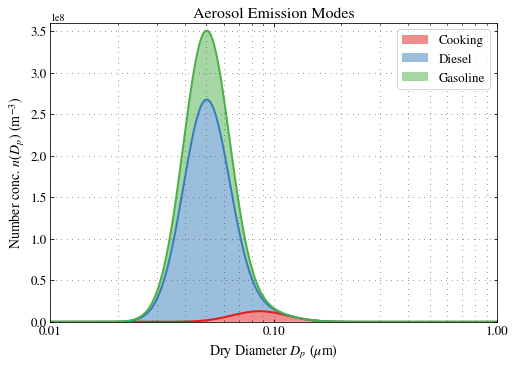

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5.5))
dist_total = np.zeros((n_grid))
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Set1.colors)
for i in df.index:
    name = df.loc[i, 'mode_name']
    dpg = df.loc[i, 'geom_mean_diam']
    nt = df.loc[i, 'num_conc']
    log10_std = df.loc[i, 'log10_geom_std_dev']
    dist = log_norm(part_diams, dpg, log10_std, nt)

    if i == 0:
        y_lower = ax.get_ylim()[0]
        yl = np.zeros((n_grid))
        yl[:] = y_lower
        y_lower = yl
    else:
        y_lower = dist_old
    dist_total = dist_total + dist
    ax.plot(part_diams*1e6, dist_total, lw=2)
    ax.fill_between(x=part_diams*1e6, y1=y_lower, y2=dist_total, label=name.replace('_', ' ').title(), 
                    alpha=.5)

    dist_old = dist_total
ax.set_xscale('log')
#ax.set_yscale('log')
#ax.set_ylim(1e6, 1e9)
ax.set_ylim(0, 3.6e8)
ax.set_xlim(1e-2, 1)
ax.grid(which = "major", linewidth = 1, axis='y', ls="dotted", dashes=(.5,5), c='#414141')
ax.grid(which = "minor", linewidth = 1, axis='x', ls="dotted", dashes=(.5,5), c='#414141')
ax.grid(which = "major", linewidth = 1, axis='x', ls="dotted", dashes=(.5,5), c='#414141')
ax.xaxis.set_major_formatter(FormatStrFormatter('%3.2f'))
ax.tick_params(axis='both', which='major', labelsize=13, direction='in', top=True, right=True, bottom=True, left=True)
ax.tick_params(axis='both', which='minor',direction='in',top=True, right=True, bottom=True, left=True)

ax.legend(fontsize=13)  
ax.set_xlabel('Dry Diameter $D_p$ ($\mu$m)', fontsize=14)
ax.set_ylabel('Number conc. $n(D_p)$ (m$^{-3}$)', fontsize=14)
ax.set_title('Aerosol Emission Modes', fontsize=16)
plt.savefig(f'urban-plume-aerosol-emissions.pdf', format='pdf', bbox_inches='tight')

In [27]:
urban_plume_aero_ics = {'aitken_mode': {'number_conc [m^-3]': 3.2e9, # 3200 per cubic cm
                                        'geom_mean_diam [m]': 0.02e-6,
                                        'geom_std_dev': 1.45,
                                        'mass_frac': {'SO4': 0.3636,'NO3': 0,
                                                      'Cl': 0,'NH4': 0.1364,
                                                      'MSA': 0,'ARO1': 0,
                                                      'ARO2': 0, 'ALK1': 0,
                                                      'OLE1': 0,'API1': 0,
                                                      'API2': 0,'LIM1': 0,
                                                      'LIM2': 0,'CO3': 0,
                                                      'Na': 0,'Ca': 0,
                                                      'OIN': 0,'OC': 0.5,
                                                      'BC': 0,'H2O': 0}
                                         },
                        'accumulation_mode': {'number_conc [m^-3]': 2.9e9,
                                        'geom_mean_diam [m]': 0.116e-6,
                                        'geom_std_dev': 1.65,
                                        'mass_frac': {'SO4': 0.3636,'NO3': 0,
                                                      'Cl': 0,'NH4': 0.1364,
                                                      'MSA': 0,'ARO1': 0,
                                                      'ARO2': 0, 'ALK1': 0,
                                                      'OLE1': 0,'API1': 0,
                                                      'API2': 0,'LIM1': 0,
                                                      'LIM2': 0,'CO3': 0,
                                                      'Na': 0,'Ca': 0,
                                                      'OIN': 0,'OC': 0.5,
                                                      'BC': 0,'H2O': 0}
                                         },
                        }

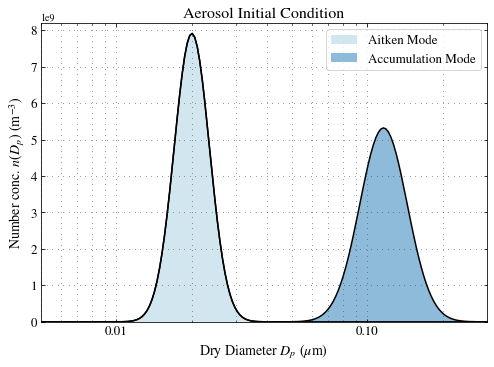

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5.5))
dist_total = np.zeros((n_grid))

plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Paired.colors)
for i, (key, attributes) in enumerate(urban_plume_aero_ics.items()):

    name = key
    dpg = attributes['geom_mean_diam [m]']
    nt = attributes['number_conc [m^-3]']
    std = attributes['geom_std_dev']
    log10_std = np.log10(std)
    dist = log_norm(part_diams, dpg, log10_std, nt)

    if i == 0:
        y_lower = ax.get_ylim()[0]
        yl = np.zeros((n_grid))
        yl[:] = y_lower
        y_lower = yl
    else:
        y_lower = dist_old
    dist_total = dist_total + dist
    ax.plot(part_diams*1e6, dist_total, c='k', lw='1.5')
    ax.fill_between(x=part_diams*1e6, y1=y_lower, y2=dist_total, label=name.replace('_', ' ').title(), 
                    alpha=.5)

    dist_old = dist_total
    
ax.set_xscale('log')
#ax.set_yscale('log')
#ax.set_ylim(1e1, 1e10)
ax.set_ylim(0, 8.2e9)
ax.set_xlim(5e-3, .3)
ax.grid(which = "major", linewidth = 1, axis='y', ls="dotted", dashes=(.5,5), c='#414141')
ax.grid(which = "minor", linewidth = 1, axis='x', ls="dotted", dashes=(.5,5), c='#414141')
ax.grid(which = "major", linewidth = 1, axis='x', ls="dotted", dashes=(.5,5), c='#414141')
ax.xaxis.set_major_formatter(FormatStrFormatter('%3.2f'))
ax.tick_params(axis='both', which='major', labelsize=13, direction='in', top=True, right=True, bottom=True, left=True)
ax.tick_params(axis='both', which='minor',direction='in',top=True, right=True, bottom=True, left=True)

ax.legend(fontsize=13)  
ax.set_xlabel('Dry Diameter $D_p$ ($\mu$m)', fontsize=14)
ax.set_ylabel('Number conc. $n(D_p)$ (m$^{-3}$)', fontsize=14)
ax.set_title('Aerosol Initial Condition', fontsize=16)

plt.savefig(f'urban-plume-aerosol-ic.pdf', format='pdf', bbox_inches='tight')


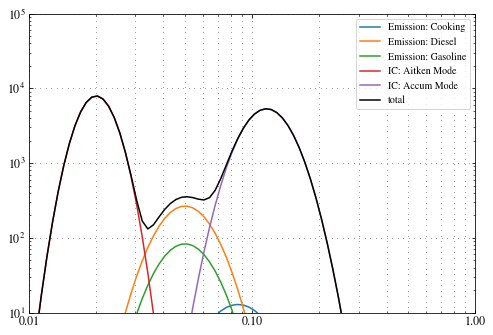

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5.5))

dist_total = np.zeros((200))

for i in df.index:
    name = df.loc[i, 'mode_name']
    dpg = df.loc[i, 'geom_mean_diam']
    nt = df.loc[i, 'num_conc']
    log10_std = df.loc[i, 'log10_geom_std_dev']
    dist = log_norm(part_diams, dpg, log10_std, nt)/1e6

    ax.plot(part_diams*1e6, dist, label=f'Emission: {name.replace("_", " ").title()}')
    dist_total += dist


for key, attributes in urban_plume_aero_ics.items():
    name = key
    dpg = attributes['geom_mean_diam [m]']
    nt = attributes['number_conc [m^-3]']
    std = attributes['geom_std_dev']
    log10_std = np.log10(std)
    dist = log_norm(part_diams, dpg, log10_std, nt)/1e6

    ax.plot(part_diams*1e6, dist, label=f'IC: {name.replace("_", " ").title()}')
    dist_total += dist

ax.plot(part_diams*1e6, dist_total, label='total', c='k')

ax.set_xscale('log')
ax.set_xlim(1e-2, 1)
ax.set_yscale('log')
ax.set_ylim(1e1, 1e5)
ax.legend()
ax.grid(which = "major", linewidth = 1, axis='y', ls="dotted", dashes=(.5,5), c='#414141')
ax.grid(which = "minor", linewidth = 1, axis='x', ls="dotted", dashes=(.5,5), c='#414141')
ax.grid(which = "major", linewidth = 1, axis='x', ls="dotted", dashes=(.5,5), c='#414141')
ax.xaxis.set_major_formatter(FormatStrFormatter('%3.2f'))
ax.tick_params(axis='both', which='major', labelsize=12, direction='in', top=True, right=True, bottom=True, left=True)
ax.tick_params(axis='both', which='minor',direction='in',top=True, right=True, bottom=True, left=True)

